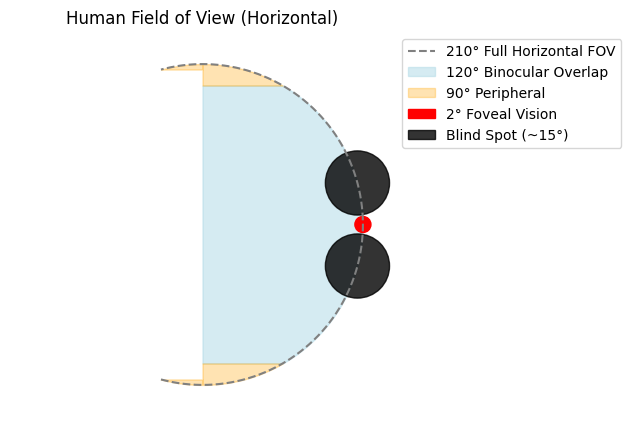

In [43]:
# human vision top-view

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(10, 5))

# Draw full horizontal FOV (210°) as arc
fov_radius = 5
theta = np.linspace(-105, 105, 500)
x = fov_radius * np.cos(np.radians(theta))
y = fov_radius * np.sin(np.radians(theta))
ax.plot(x, y, color="gray", linestyle="--", label="210° Full Horizontal FOV")

# Binocular overlap region (120°) centered
theta_overlap = np.linspace(-60, 60, 500)
x_overlap = fov_radius * np.cos(np.radians(theta_overlap))
y_overlap = fov_radius * np.sin(np.radians(theta_overlap))
ax.fill_betweenx(y_overlap, 0, x_overlap, color="lightblue", alpha=0.5, label="120° Binocular Overlap")

# Peripheral vision (remaining 90° outside binocular overlap)
theta_periph_left = np.linspace(-105, -60, 200)
theta_periph_right = np.linspace(60, 105, 200)
x_periph_left = fov_radius * np.cos(np.radians(theta_periph_left))
y_periph_left = fov_radius * np.sin(np.radians(theta_periph_left))
x_periph_right = fov_radius * np.cos(np.radians(theta_periph_right))
y_periph_right = fov_radius * np.sin(np.radians(theta_periph_right))
ax.fill_betweenx(y_periph_left, 0, x_periph_left, color="orange", alpha=0.3, label="90° Peripheral")
ax.fill_betweenx(y_periph_right, 0, x_periph_right, color="orange", alpha=0.3)

# Foveal vision (tiny sharp central cone ~2°)
foveal_radius = fov_radius * 0.05
fovea = patches.Circle((fov_radius, 0), foveal_radius, color="red", label="2° Foveal Vision")
ax.add_patch(fovea)

# Blind spot (black area ~15° off-center)
blind_angle = 15
blind_radius = fov_radius * 0.2
blind_x = fov_radius * np.cos(np.radians(blind_angle))
blind_y = fov_radius * np.sin(np.radians(blind_angle))
blind_spot = patches.Circle((blind_x, blind_y), blind_radius, color="black", alpha=0.8, label="Blind Spot (~15°)")
ax.add_patch(blind_spot)

# Mirror blind spot on other side
blind_angle2 = -15
blind_x2 = fov_radius * np.cos(np.radians(blind_angle2))
blind_y2 = fov_radius * np.sin(np.radians(blind_angle2))
blind_spot2 = patches.Circle((blind_x2, blind_y2), blind_radius, color="black", alpha=0.8)
ax.add_patch(blind_spot2)

# Formatting
ax.set_aspect("equal")
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_title("Human Field of View (Horizontal)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.axis("off")

plt.show()


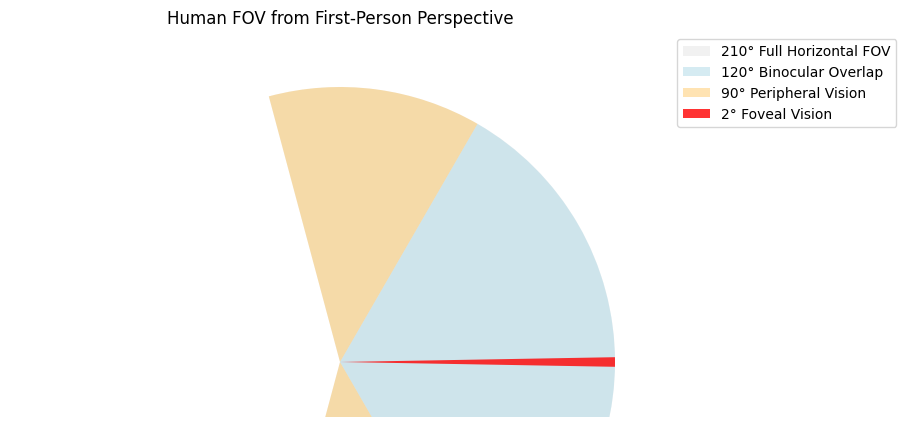

In [44]:
# fpp, top-view [corrected manually]

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 5))

# Draw full horizontal FOV (210°) as wedge
full_fov = patches.Wedge(center=(0, 0), r=5, theta1=-105, theta2=105, 
                         facecolor="lightgray", alpha=0.3, label="210° Full Horizontal FOV")
ax.add_patch(full_fov)

# Binocular overlap (120°)
binocular = patches.Wedge(center=(0, 0), r=5, theta1=-60, theta2=60,
                          facecolor="lightblue", alpha=0.5, label="120° Binocular Overlap")
ax.add_patch(binocular)

# Peripheral vision (remaining sides)
peripheral_left = patches.Wedge(center=(0, 0), r=5, theta1=-105, theta2=-60,
                                facecolor="orange", alpha=0.3, label="90° Peripheral Vision")
peripheral_right = patches.Wedge(center=(0, 0), r=5, theta1=60, theta2=105,
                                 facecolor="orange", alpha=0.3)
ax.add_patch(peripheral_left)
ax.add_patch(peripheral_right)

# Foveal vision (tiny cone)
foveal = patches.Wedge(center=(0, 0), r=5, theta1=-1, theta2=1,
                       facecolor="red", alpha=0.8, label="2° Foveal Vision")
ax.add_patch(foveal)

# # Blind spots (~15° off-center, black wedges)
# blind_left = patches.Wedge(center=(0, 0), r=5, theta1=-17, theta2=-13,
#                            facecolor="black", alpha=0.9, label="Blind Spot (~15° off-center)")
# blind_right = patches.Wedge(center=(0, 0), r=5, theta1=13, theta2=17,
#                             facecolor="black", alpha=0.9)
# ax.add_patch(blind_left)
# ax.add_patch(blind_right)

# Formatting
ax.set_aspect("equal")
ax.set_xlim(-6, 6)
ax.set_ylim(-1, 6)
ax.set_title("Human FOV from First-Person Perspective")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.axis("off")

plt.show()


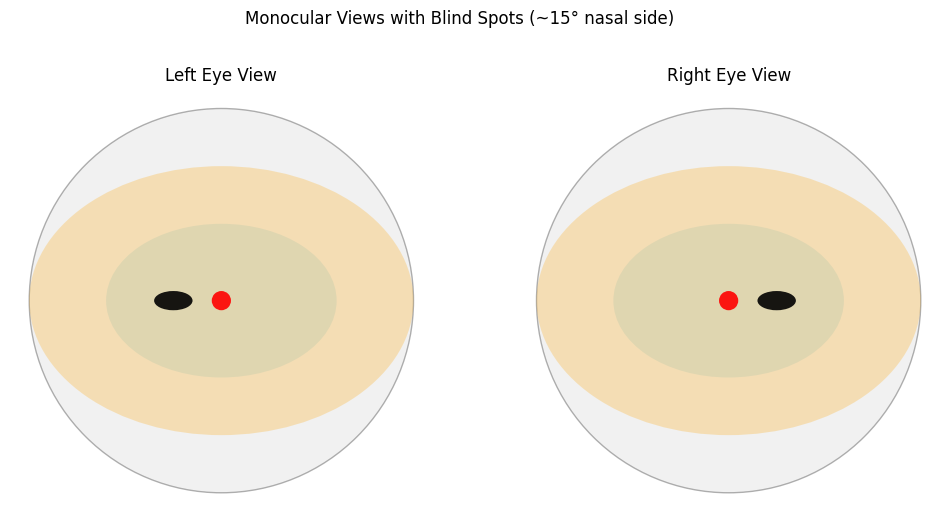

In [45]:
# each eye fpp

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Parameters
fov_radius = 1

def draw_eye(ax, side="left"):
    # Base circle (FOV projection)
    fov_circle = patches.Circle((0, 0), fov_radius, edgecolor="black", facecolor="lightgray", alpha=0.3)
    ax.add_patch(fov_circle)
    
    # Binocular overlap (center ellipse)
    binocular = patches.Ellipse((0, 0), width=1.2, height=0.8,
                                facecolor="lightblue", alpha=0.4)
    ax.add_patch(binocular)

    # Peripheral vision
    peripheral = patches.Ellipse((0, 0), width=2, height=1.4,
                                 facecolor="orange", alpha=0.25)
    ax.add_patch(peripheral)

    # Foveal vision
    foveal = patches.Circle((0, 0), 0.05, facecolor="red", alpha=0.9)
    ax.add_patch(foveal)

    # Blind spot position (15° nasal side)
    offset = -0.25 if side == "left" else 0.25
    blind = patches.Ellipse((offset, 0), width=0.2, height=0.1,
                            facecolor="black", alpha=0.9)
    ax.add_patch(blind)

    # Formatting
    ax.set_aspect("equal")
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.axis("off")
    ax.set_title(f"{side.capitalize()} Eye View")

# Draw for left and right eyes
draw_eye(axes[0], "left")
draw_eye(axes[1], "right")

plt.suptitle("Monocular Views with Blind Spots (~15° nasal side)")
plt.show()



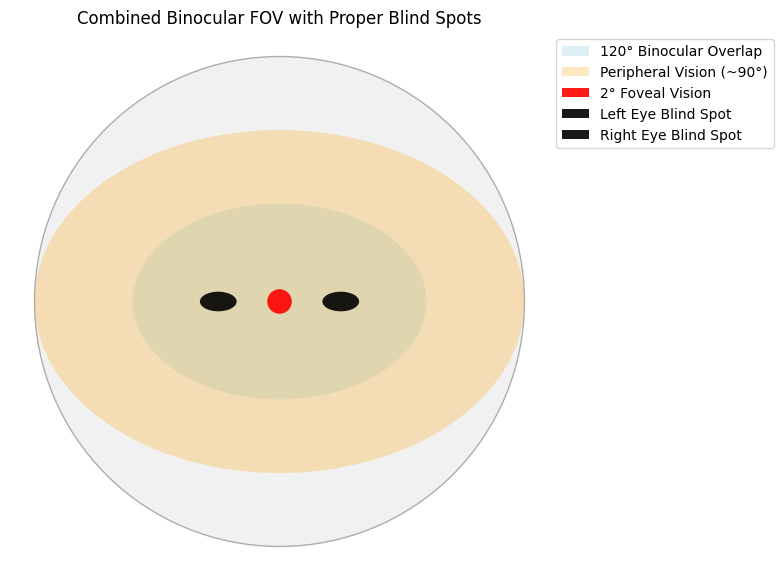

In [46]:
# overlap each eye fpp

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(7, 7))

# Base circle for full visual field projection
fov_circle = patches.Circle((0, 0), 1, edgecolor="black", facecolor="lightgray", alpha=0.3)
ax.add_patch(fov_circle)

# Binocular overlap (center ellipse)
binocular = patches.Ellipse((0, 0), width=1.2, height=0.8,
                            facecolor="lightblue", alpha=0.4, label="120° Binocular Overlap")
ax.add_patch(binocular)

# Peripheral vision (outer ellipse)
peripheral = patches.Ellipse((0, 0), width=2, height=1.4,
                             facecolor="orange", alpha=0.25, label="Peripheral Vision (~90°)")
ax.add_patch(peripheral)

# Foveal vision (tiny sharp spot)
foveal = patches.Circle((0, 0), 0.05, facecolor="red", alpha=0.9, label="2° Foveal Vision")
ax.add_patch(foveal)

# Blind spots: offset toward the nasal side for each eye
# Left eye blind spot (to the left, nasal side)
blind_left = patches.Ellipse((-0.25, 0), width=0.15, height=0.08,
                             facecolor="black", alpha=0.9, label="Left Eye Blind Spot")
# Right eye blind spot (to the right, nasal side)
blind_right = patches.Ellipse((0.25, 0), width=0.15, height=0.08,
                              facecolor="black", alpha=0.9, label="Right Eye Blind Spot")

ax.add_patch(blind_left)
ax.add_patch(blind_right)

# Formatting
ax.set_aspect("equal")
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title("Combined Binocular FOV with Proper Blind Spots")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.axis("off")

plt.show()


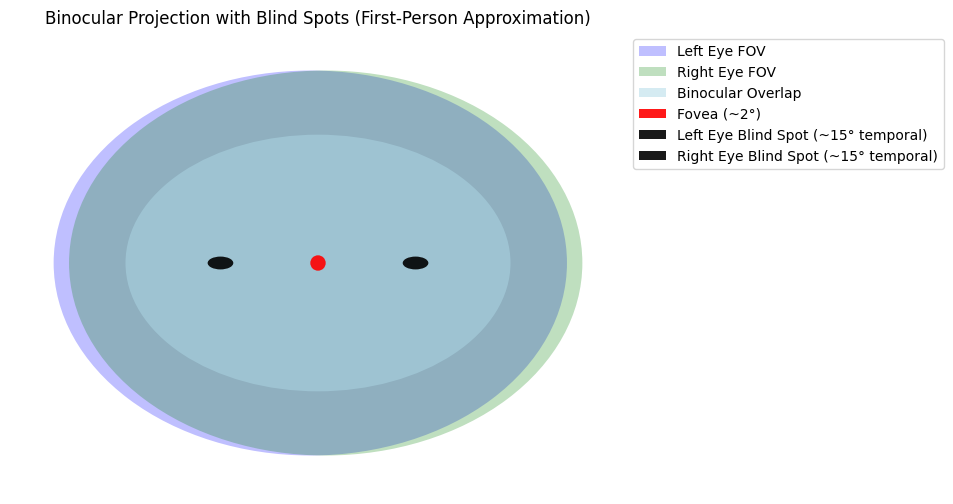

In [47]:
# fpp both eyes overlapped aprox

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(figsize=(10, 6))

# Parameters
eye_sep = 0.06  # interpupillary distance (6 cm)
fov_radius = 1.0

# Function to draw each eye's projection ellipse (flattened)
def draw_eye_projection(ax, center_x, color, label):
    ellipse = patches.Ellipse((center_x, 0), width=2*fov_radius, height=1.5*fov_radius,
                              facecolor=color, alpha=0.25, label=label, edgecolor=None)
    ax.add_patch(ellipse)

# Draw left and right eye FOV ellipses
draw_eye_projection(ax, -eye_sep/2, "blue", "Left Eye FOV")
draw_eye_projection(ax,  eye_sep/2, "green", "Right Eye FOV")

# Binocular overlap (intersection zone)
overlap = patches.Ellipse((0, 0), width=1.5*fov_radius, height=1.0*fov_radius,
                          facecolor="lightblue", alpha=0.5, label="Binocular Overlap")
ax.add_patch(overlap)

# Foveal vision (small dot in center)
fovea = patches.Circle((0, 0), 0.03, facecolor="red", alpha=0.9, label="Fovea (~2°)")
ax.add_patch(fovea)

# Blind spots: ~15° temporal from fixation point (far edges)
# Approximate them as black ovals on each eye's ellipse
blind_offset = 0.35
blind_left = patches.Ellipse((-eye_sep/2 - blind_offset, 0), width=0.1, height=0.05,
                             facecolor="black", alpha=0.9, label="Left Eye Blind Spot (~15° temporal)")
blind_right = patches.Ellipse(( eye_sep/2 + blind_offset, 0), width=0.1, height=0.05,
                              facecolor="black", alpha=0.9, label="Right Eye Blind Spot (~15° temporal)")
ax.add_patch(blind_left)
ax.add_patch(blind_right)

# Formatting
ax.set_aspect("equal")
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-0.9, 0.9)
ax.set_title("Binocular Projection with Blind Spots (First-Person Approximation)")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.axis("off")

plt.show()


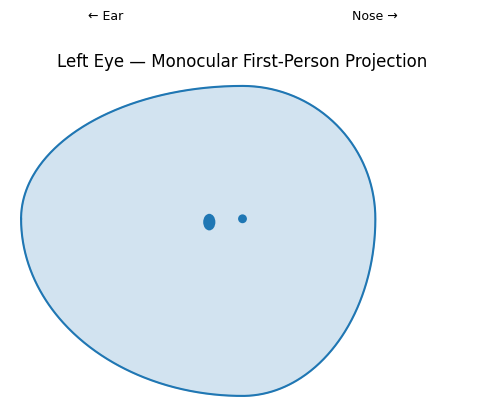

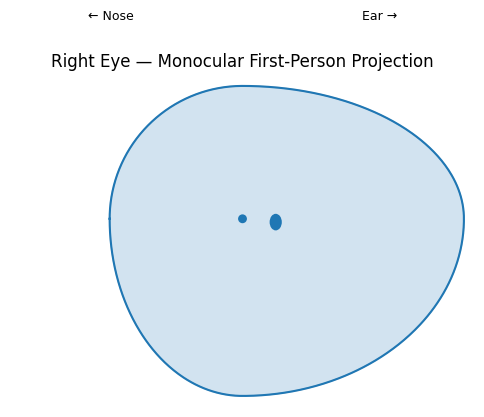

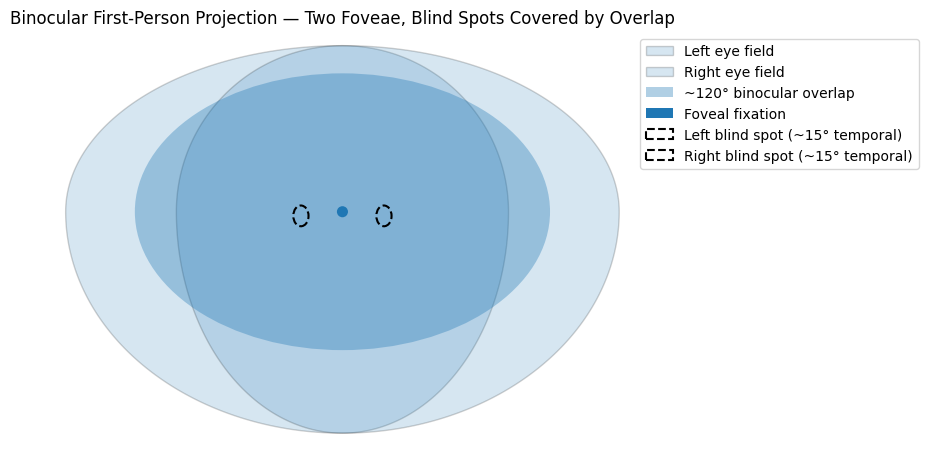

In [48]:
# Accurate-ish monocular and binocular first-person projections
# using published visual field extents and blind spot parameters.
#
# Data used (cited in chat):
# - Monocular extents: ~60° nasal, ~100° temporal, ~60° superior, ~80° inferior
# - Binocular overlap: ~120°
# - Blind spot: center ~12–15° temporal, ~1.5° below horizontal; size ~7.5° high x 5.5° wide
#
# Implementation notes:
# - Normalization: 1.0 on the horizontal axis == 100° temporal (per-eye).
# - Outline computed with piecewise anisotropic ellipse depending on quadrant
#   to honor asymmetric nasal/temporal and superior/inferior limits.
#
# Matplotlib only, one chart per figure, default colors.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# Parameters from literature
EXTENTS = {
    "nasal": 60.0,
    "temporal": 100.0,
    "superior": 60.0,
    "inferior": 80.0,
}
BLIND = {
    "theta_temporal_deg": 15.0,    # temporal offset
    "vertical_offset_deg": -1.5,   # below horizontal
    "height_deg": 7.5,
    "width_deg": 5.5,
}

SCALE = 100.0  # degrees per normalized unit on the horizontal (temporal) axis

def anisotropic_outline(eye="right", n=720):
    """
    Compute an anisotropic 'ellipse' boundary that respects asymmetric limits.
    Returns Nx2 array of (x,y) in normalized units (1.0 = 100° temporal).
    """
    th = np.linspace(-np.pi, np.pi, n, endpoint=True)
    xs, ys = [], []
    for t in th:
        # Determine which half-axes apply based on direction
        cos_t, sin_t = np.cos(t), np.sin(t)
        # Horizontal half-extent A depends on temporal vs nasal side
        if eye == "right":
            A = EXTENTS["temporal"] if cos_t >= 0 else EXTENTS["nasal"]
        else:  # left eye: temporal is to the LEFT in the visual field (cos<0)
            A = EXTENTS["nasal"] if cos_t >= 0 else EXTENTS["temporal"]
        # Vertical half-extent B depends on up vs down
        B = EXTENTS["superior"] if sin_t >= 0 else EXTENTS["inferior"]
        # Radius for anisotropic ellipse in that quadrant
        r = 1.0 / np.sqrt((cos_t / A) ** 2 + (sin_t / B) ** 2)
        x = (r * cos_t) / SCALE  # normalize by 100°
        y = (r * sin_t) / SCALE
        xs.append(x)
        ys.append(y)
    return np.column_stack([xs, ys])

def draw_monocular(eye="right"):
    plt.close("all")
    pts = anisotropic_outline(eye)
    fig, ax = plt.subplots(figsize=(6, 6))
    # Fill monocular field
    path = Path(pts, closed=True)
    patch = PathPatch(path, alpha=0.2)
    ax.add_patch(patch)
    # Draw border
    ax.plot(pts[:,0], pts[:,1], linewidth=1.5)
    # Fovea (each eye has its own): at fixation
    ax.add_patch(Circle((0, 0), 0.02, label="Fovea (~2° radius ~1°)"))
    # Blind spot placement (temporal side for that eye)
    sign = 1 if eye == "right" else -1  # temporal is +x for right eye, -x for left eye
    bs_x = sign * (BLIND["theta_temporal_deg"] / SCALE)
    bs_y = BLIND["vertical_offset_deg"] / SCALE
    bs_w = BLIND["width_deg"] / SCALE
    bs_h = BLIND["height_deg"] / SCALE
    ax.add_patch(Ellipse((bs_x, bs_y), bs_w, bs_h))
    # Orientation labels (minimal)
    if eye == "right":
        ax.text(-0.7, 0.9, "← Nose", fontsize=9)
        ax.text(0.7, 0.9, "Ear →", fontsize=9, ha="right")
        title = "Right Eye — Monocular First‑Person Projection"
    else:
        ax.text(0.7, 0.9, "Nose →", fontsize=9, ha="right")
        ax.text(-0.7, 0.9, "← Ear", fontsize=9)
        title = "Left Eye — Monocular First‑Person Projection"
    ax.set_title(title)
    ax.set_aspect("equal")
    ax.set_xlim(-EXTENTS["nasal"]/SCALE, EXTENTS["temporal"]/SCALE if eye=="right" else EXTENTS["nasal"]/SCALE)
    # For left eye, leftwards extends to temporal/100 = -1.0; rightwards to nasal/100
    # But for simplicity show symmetric around [-1.0, +1.0] horizontally
    ax.set_xlim(-1.05, 1.05)
    ax.set_ylim(-EXTENTS["inferior"]/SCALE - 0.05, EXTENTS["superior"]/SCALE + 0.05)
    ax.axis("off")
    plt.show()

# Draw monocular charts
draw_monocular("left")
draw_monocular("right")

# Binocular: union of the two outlines; show overlap region and note blind spots are covered
plt.close("all")
left_pts = anisotropic_outline("left")
right_pts = anisotropic_outline("right")

fig, ax = plt.subplots(figsize=(7.5, 6))

# Fill each eye lightly
left_patch = PathPatch(Path(left_pts, closed=True), alpha=0.18, label="Left eye field")
right_patch = PathPatch(Path(right_pts, closed=True), alpha=0.18, label="Right eye field")
ax.add_patch(left_patch)
ax.add_patch(right_patch)

# Approximate binocular overlap as intersection of bounding boxes via central ellipse proxy
# (for clarity rather than perfect set math)
overlap = Ellipse((0, 0), 1.5/ (SCALE/100), 1.0/(SCALE/100), alpha=0.35, label="~120° binocular overlap")
ax.add_patch(overlap)

# Foveae align on fixation (two foveae, one fixation point)
ax.add_patch(Circle((0, 0), 0.02, label="Foveal fixation"))

# Indicate where each eye's blind spot would be (dashed, to show they’re covered binocularly)
for sign, lbl in [(-1, "Left blind spot (~15° temporal)"), (1, "Right blind spot (~15° temporal)")]:
    bs_x = sign * (BLIND["theta_temporal_deg"] / SCALE)
    bs_y = BLIND["vertical_offset_deg"] / SCALE
    bs_w = BLIND["width_deg"] / SCALE
    bs_h = BLIND["height_deg"] / SCALE
    e = Ellipse((bs_x, bs_y), bs_w, bs_h, fill=False, linestyle="--", linewidth=1.5, label=lbl)
    ax.add_patch(e)

ax.set_title("Binocular First‑Person Projection — Two Foveae, Blind Spots Covered by Overlap")
ax.set_aspect("equal")
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-EXTENTS["inferior"]/SCALE - 0.05, EXTENTS["superior"]/SCALE + 0.05)
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.axis("off")
plt.show()


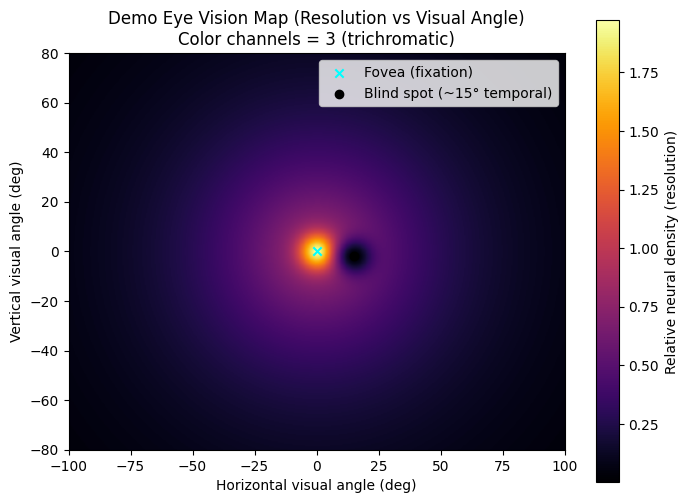

In [49]:
# relative resolution map
import matplotlib.pyplot as plt
import numpy as np

# Demo "vision map" generator
def make_vision_map(foveal_width=5, blind_offset=15, blind_size=5, color_channels=3):
    """
    Generate a simplified map of an eye's visual field with:
    - Fovea (central high density)
    - Resolution falloff (radial gradient)
    - Blind spot (absolute zero resolution)
    - Color channels = just annotated, not simulated
    """

    # Grid in degrees
    x = np.linspace(-100, 100, 400)  # horizontal FOV: nasal ~60, temporal ~100
    y = np.linspace(-80, 80, 320)    # vertical: ~60 up, 80 down
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)

    # Resolution model
    # Base falloff: inversely proportional to distance from center
    resolution = np.exp(-(R / 40))

    # Add fovea: Gaussian bump at center
    resolution += np.exp(-(R**2) / (2 * foveal_width**2))

    # Blind spot: subtract at temporal side
    bs_x = blind_offset
    bs_y = -2  # slightly below horizontal
    blind_mask = np.exp(-(((X - bs_x)**2 + (Y - bs_y)**2) / (2 * blind_size**2)))
    resolution *= (1 - blind_mask)

    return resolution, x, y

# Generate demo map
res_map, x, y = make_vision_map(foveal_width=5, blind_offset=15, blind_size=5, color_channels=3)

plt.figure(figsize=(8, 6))
plt.imshow(res_map, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="inferno")
plt.colorbar(label="Relative neural density (resolution)")
plt.scatter(0, 0, color="cyan", marker="x", label="Fovea (fixation)")
plt.scatter(15, -2, color="black", marker="o", label="Blind spot (~15° temporal)")
plt.title("Demo Eye Vision Map (Resolution vs Visual Angle)\nColor channels = 3 (trichromatic)")
plt.xlabel("Horizontal visual angle (deg)")
plt.ylabel("Vertical visual angle (deg)")
plt.legend(loc="upper right")
plt.show()


/tmp/ipykernel_24879/71915463.py:118: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, mask, levels=[0.5], colors="k", linewidths=1, label="Anatomical field boundary")


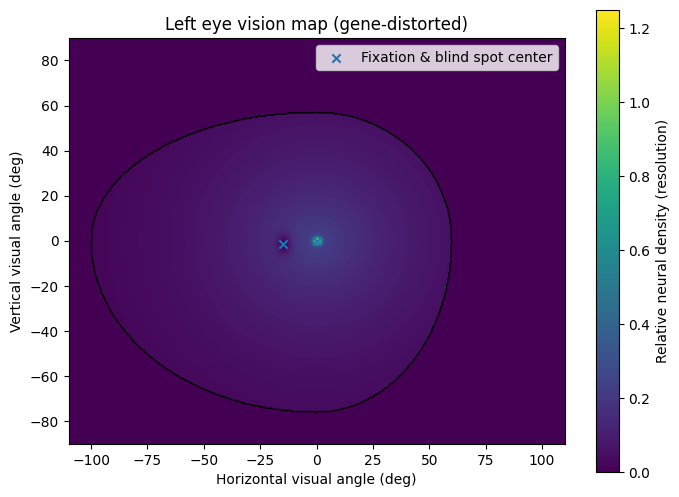

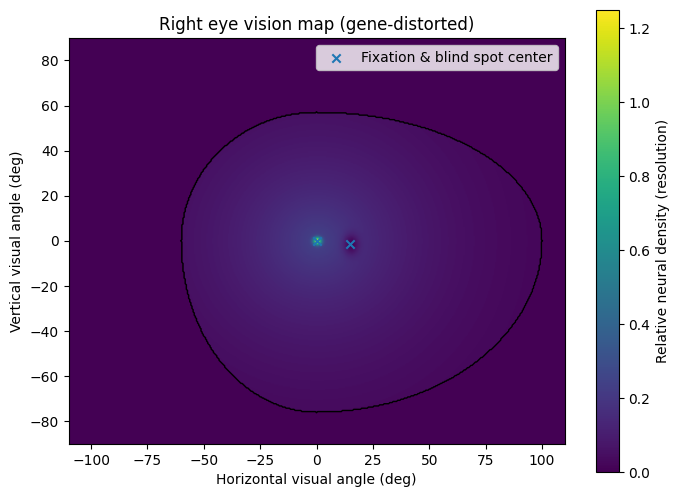

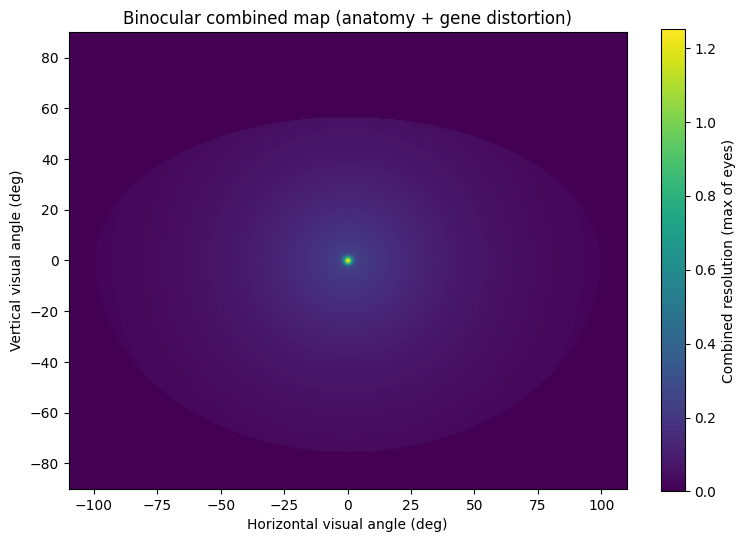

,Eye,Zone,Inner deg,Outer deg,Cost (arb.),Share (%)
0,Left,Fovea,0.0,2.0,9.009257,0.697163
1,Left,Parafovea,2.0,5.0,17.114304,1.324355
2,Left,Perifovea,5.0,10.0,48.136369,3.724934
3,Left,Mid-periphery,10.0,30.0,355.795986,27.532538
4,Left,Far periphery,30.0,100.0,862.213510,66.720613
5,Right,Fovea,0.0,2.0,9.009257,0.697163
6,Right,Parafovea,2.0,5.0,17.114304,1.324355
7,Right,Perifovea,5.0,10.0,48.136369,3.724934
8,Right,Mid-periphery,10.0,30.0,355.795986,27.532538
9,Right,Far periphery,30.0,100.0,862.213510,66.720613


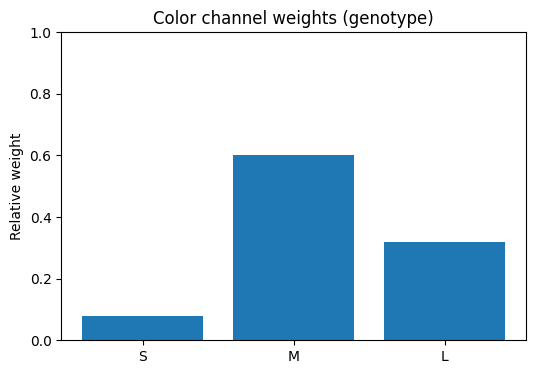

In [50]:
# Comprehensive vision map demo with anatomy-constrained fields, gene-based distortions,
# per-zone neural density (brain power usage), and color channel “genotype”.
#
# Notes:
# - One chart per figure (no subplots), matplotlib only, no explicit color choices.
# - Angles in degrees. Visual field extents follow typical human values and can be gene-modified.
# - Left/Right eyes rendered separately plus a binocular combined map.
# - A table of neural "cost" per eccentricity zone is produced.
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from IPython.display import display  # for Jupyter

# ---------- Baseline anatomy (degrees) ----------
BASE_EXTENTS = dict(nasal=60.0, temporal=100.0, superior=60.0, inferior=80.0)
BLIND_BASE = dict(offset_temporal_deg=15.0, offset_vertical_deg=-1.5,
                  width_deg=5.5, height_deg=7.5)

# ---------- Gene model (example individual) ----------
GENE = {
    # Field extents multipliers (mild species variation)
    "nasal_scale": 1.0,
    "temporal_scale": 1.0,
    "superior_scale": 1.0,
    "inferior_scale": 1.0,
    # Coordinate anisotropy (e.g., corneal shape / astigmatism proxy)
    "warp_x": 1.00,   # >1 stretches horizontally (wider)
    "warp_y": 0.95,   # <1 compresses vertically
    # Foveal parameters
    "foveal_sigma_deg": 1.2,   # std dev of central Gaussian (~2° wide)
    "foveal_peak": 1.0,        # peak density multiplier
    # Peripheral falloff
    "falloff_scale_deg": 40.0, # larger = slower falloff
    # Blind spot tweaks
    "blind_dx_deg": 0.0,       # horizontal shift
    "blind_dy_deg": 0.0,       # vertical shift
    "blind_w_scale": 1.0,
    "blind_h_scale": 1.0,
    # Global sensitivity (photoreceptor density baseline)
    "baseline_gain": 0.25,
    # Color channels (weights only for demo; not used in rendering here)
    "color_channels": {"S": 0.08, "M": 0.60, "L": 0.32},  # sums to 1.0
}

# ---------- Grid ----------
# Horizontal spans roughly: -100..+100 (temporal extreme), vertical -80..+80
dx = 0.5
dy = 0.5
x = np.arange(-110, 110 + dx, dx)
y = np.arange(-90, 90 + dy, dy)
X, Y = np.meshgrid(x, y)  # degrees in visual field coordinates

def extents_for_angle(theta, eye, gene):
    """Piecewise anisotropic ellipse boundary: returns radius (deg) for a given polar angle theta."""
    if eye == "right":
        temporal_side = np.cos(theta) >= 0
    else:
        temporal_side = np.cos(theta) < 0
    
    if temporal_side:
        A = BASE_EXTENTS["temporal"] * gene["temporal_scale"]
    else:
        A = BASE_EXTENTS["nasal"] * gene["nasal_scale"]
    B = (BASE_EXTENTS["superior"] * gene["superior_scale"]) if (np.sin(theta) >= 0) \
        else (BASE_EXTENTS["inferior"] * gene["inferior_scale"])
    r = 1.0 / np.sqrt((np.cos(theta) / A) ** 2 + (np.sin(theta) / B) ** 2)
    return r

def field_mask(X, Y, eye, gene):
    Xw = X / gene["warp_x"]
    Yw = Y / gene["warp_y"]
    theta = np.arctan2(Yw, Xw)
    R = np.hypot(Xw, Yw)
    r_boundary = np.vectorize(lambda t: extents_for_angle(t, eye, gene))(theta)
    return (R <= r_boundary).astype(float), Xw, Yw

def resolution_map(X, Y, mask, eye, gene):
    _, Xw, Yw = field_mask(X, Y, eye, gene)
    Rw = np.hypot(Xw, Yw)
    res = gene["baseline_gain"] * np.exp(-Rw / gene["falloff_scale_deg"])
    sigma = gene["foveal_sigma_deg"]
    res += gene["foveal_peak"] * np.exp(-(Rw**2) / (2 * sigma**2))
    sign = 1.0 if eye == "right" else -1.0
    bs_x = sign * (BLIND_BASE["offset_temporal_deg"] + gene["blind_dx_deg"])
    bs_y = (BLIND_BASE["offset_vertical_deg"] + gene["blind_dy_deg"])
    bs_w = BLIND_BASE["width_deg"] * gene["blind_w_scale"]
    bs_h = BLIND_BASE["height_deg"] * gene["blind_h_scale"]
    blind = np.exp(-(((X - bs_x) / (bs_w / 2.355))**2 + ((Y - bs_y) / (bs_h / 2.355))**2) / 2.0)
    res *= (1.0 - np.clip(blind, 0.0, 1.0))
    res *= mask
    return res

ZONES = [
    ("Fovea", 0.0, 2.0),
    ("Parafovea", 2.0, 5.0),
    ("Perifovea", 5.0, 10.0),
    ("Mid-periphery", 10.0, 30.0),
    ("Far periphery", 30.0, 100.0),
]

def zone_labels(X, Y):
    R = np.hypot(X, Y)
    labels = np.full(R.shape, -1, dtype=int)
    for i, (_, a, b) in enumerate(ZONES):
        labels[(R >= a) & (R < b)] = i
    return labels

def render_eye(eye, gene, title_suffix="(gene-distorted)"):
    mask, Xw, Yw = field_mask(X, Y, eye, gene)
    res = resolution_map(X, Y, mask, eye, gene)
    plt.close("all")
    plt.figure(figsize=(8, 6))
    plt.imshow(res, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower")
    plt.colorbar(label="Relative neural density (resolution)")
    # Contour with direct label
    plt.contour(X, Y, mask, levels=[0.5], colors="k", linewidths=1, label="Anatomical field boundary")
    # Mark blind spot center
    sign = 1.0 if eye == "right" else -1.0
    bs_x = sign * (BLIND_BASE["offset_temporal_deg"] + gene["blind_dx_deg"])
    bs_y = (BLIND_BASE["offset_vertical_deg"] + gene["blind_dy_deg"])
    plt.scatter([0, bs_x], [0, bs_y], marker="x", label="Fixation & blind spot center")
    plt.title(f"{eye.capitalize()} eye vision map {title_suffix}")
    plt.xlabel("Horizontal visual angle (deg)")
    plt.ylabel("Vertical visual angle (deg)")
    plt.legend(loc="upper right")
    plt.show()
    return res, mask

def binocular_map(res_L, mask_L, res_R, mask_R):
    res = np.maximum(res_L, res_R)
    mask = np.maximum(mask_L, mask_R)
    res *= mask
    plt.close("all")
    plt.figure(figsize=(9, 6))
    plt.imshow(res, extent=(x.min(), x.max(), y.min(), y.max()), origin="lower")
    plt.colorbar(label="Combined resolution (max of eyes)")
    plt.contour(X, Y, mask, levels=[0.5])
    plt.title("Binocular combined map (anatomy + gene distortion)")
    plt.xlabel("Horizontal visual angle (deg)")
    plt.ylabel("Vertical visual angle (deg)")
    plt.show()

def neural_cost_table(res, eye_name):
    labels = zone_labels(X, Y)
    pixel_area = dx * dy
    rows = []
    total_cost = (res).sum() * pixel_area
    for i, (name, a, b) in enumerate(ZONES):
        zone_cost = (res[labels == i]).sum() * pixel_area
        rows.append({
            "Eye": eye_name,
            "Zone": name,
            "Inner deg": a,
            "Outer deg": b,
            "Cost (arb.)": zone_cost,
            "Share (%)": (100.0 * zone_cost / total_cost) if total_cost > 0 else 0.0,
        })
    df = pd.DataFrame(rows)
    return df

def color_channel_bars(channels, title="Color channel weights (genotype)"):
    names = list(channels.keys())
    vals = [channels[k] for k in names]
    plt.close("all")
    plt.figure(figsize=(6, 4))
    plt.bar(names, vals)
    plt.ylim(0, 1)
    plt.title(title)
    plt.ylabel("Relative weight")
    plt.show()

# --------- Render demo individual ---------
res_L, mask_L = render_eye("left", GENE)
res_R, mask_R = render_eye("right", GENE)
binocular_map(res_L, mask_L, res_R, mask_R)

# --------- Neural cost accounting ---------
dfL = neural_cost_table(res_L, "Left")
dfR = neural_cost_table(res_R, "Right")
df = pd.concat([dfL, dfR], ignore_index=True)
display(df)  # works in Jupyter

# --------- Color channel genotype ---------
color_channel_bars(GENE["color_channels"])


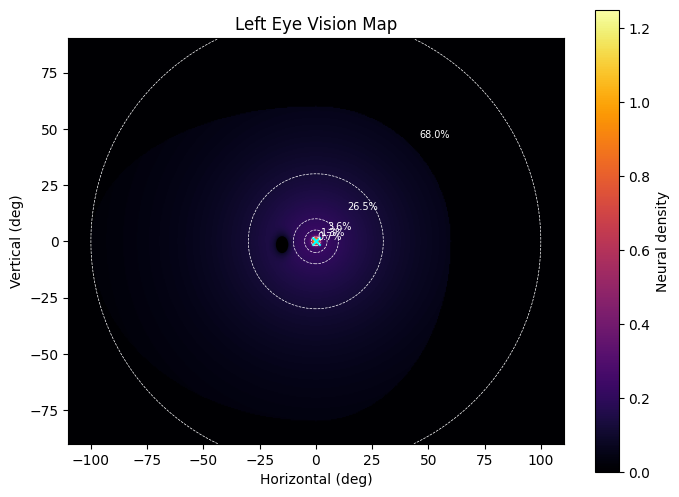

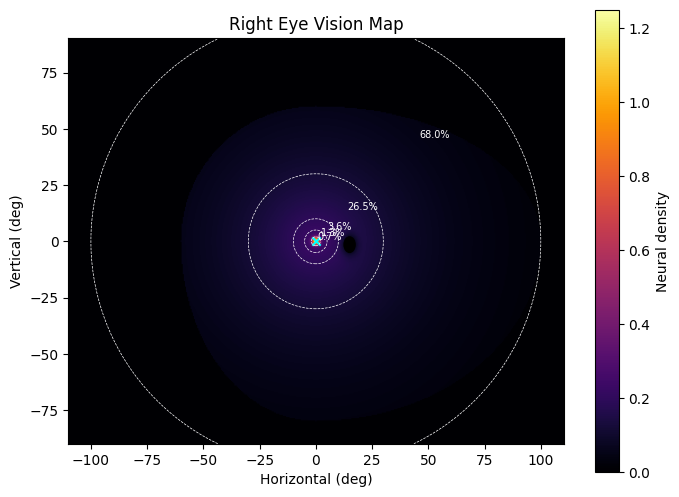

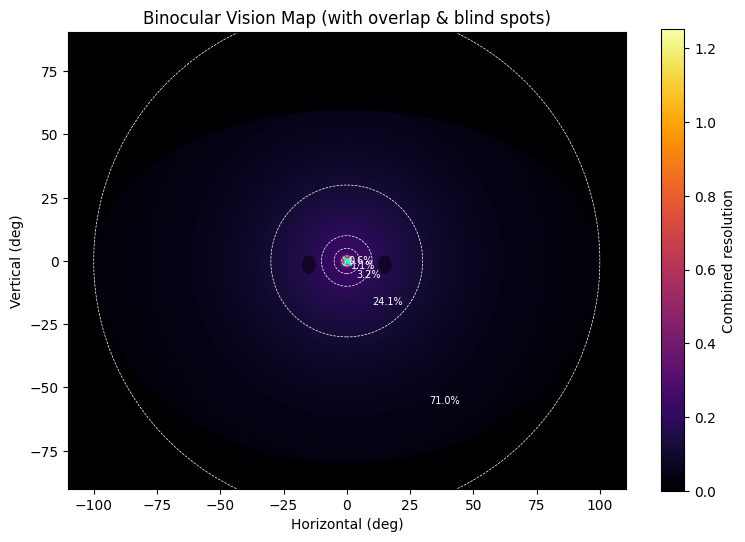

In [51]:
# comprehensive
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Circle
import pandas as pd

# --- Parameters reused from earlier ---
BASE_EXTENTS = dict(nasal=60.0, temporal=100.0, superior=60.0, inferior=80.0)
BLIND_BASE = dict(offset_temporal_deg=15.0, offset_vertical_deg=-1.5,
                  width_deg=5.5, height_deg=7.5)
GENE = {
    "nasal_scale": 1.0, "temporal_scale": 1.0, "superior_scale": 1.0, "inferior_scale": 1.0,
    "warp_x": 1.0, "warp_y": 1.0,
    "foveal_sigma_deg": 1.2, "foveal_peak": 1.0,
    "falloff_scale_deg": 40.0,
    "blind_dx_deg": 0.0, "blind_dy_deg": 0.0, "blind_w_scale": 1.0, "blind_h_scale": 1.0,
    "baseline_gain": 0.25,
    "color_channels": {"S": 0.08, "M": 0.60, "L": 0.32}
}
ZONES = [
    ("Fovea", 0.0, 2.0),
    ("Parafovea", 2.0, 5.0),
    ("Perifovea", 5.0, 10.0),
    ("Mid-periphery", 10.0, 30.0),
    ("Far periphery", 30.0, 100.0),
]
dx, dy = 0.5, 0.5
x = np.arange(-110, 111, dx)
y = np.arange(-90, 91, dy)
X, Y = np.meshgrid(x, y)

def extents_for_angle(theta, eye, gene):
    if eye == "right":
        temporal_side = np.cos(theta) >= 0
    else:
        temporal_side = np.cos(theta) < 0
    if temporal_side:
        A = BASE_EXTENTS["temporal"] * gene["temporal_scale"]
    else:
        A = BASE_EXTENTS["nasal"] * gene["nasal_scale"]
    B = (BASE_EXTENTS["superior"] * gene["superior_scale"]) if (np.sin(theta) >= 0) \
        else (BASE_EXTENTS["inferior"] * gene["inferior_scale"])
    return 1.0 / np.sqrt((np.cos(theta)/A)**2 + (np.sin(theta)/B)**2)

def field_mask(X, Y, eye, gene):
    Xw = X / gene["warp_x"]; Yw = Y / gene["warp_y"]
    theta = np.arctan2(Yw, Xw)
    R = np.hypot(Xw, Yw)
    r_boundary = np.vectorize(lambda t: extents_for_angle(t, eye, gene))(theta)
    return (R <= r_boundary).astype(float)

def resolution_map(X, Y, mask, eye, gene):
    Xw = X/gene["warp_x"]; Yw = Y/gene["warp_y"]
    Rw = np.hypot(Xw, Yw)
    res = gene["baseline_gain"]*np.exp(-Rw/gene["falloff_scale_deg"])
    sigma = gene["foveal_sigma_deg"]
    res += gene["foveal_peak"]*np.exp(-(Rw**2)/(2*sigma**2))
    sign = 1 if eye=="right" else -1
    bs_x = sign*(BLIND_BASE["offset_temporal_deg"]+gene["blind_dx_deg"])
    bs_y = BLIND_BASE["offset_vertical_deg"]+gene["blind_dy_deg"]
    bs_w = BLIND_BASE["width_deg"]*gene["blind_w_scale"]
    bs_h = BLIND_BASE["height_deg"]*gene["blind_h_scale"]
    blind = np.exp(-(((X-bs_x)/(bs_w/2.355))**2+((Y-bs_y)/(bs_h/2.355))**2)/2.0)
    res *= (1-np.clip(blind,0,1))
    return res*mask

def zone_labels(X, Y):
    R = np.hypot(X,Y)
    labels = np.full(R.shape,-1,int)
    for i,(_,a,b) in enumerate(ZONES):
        labels[(R>=a)&(R<b)] = i
    return labels

def neural_cost(res):
    labels = zone_labels(X,Y)
    pixel_area = dx*dy
    total = (res).sum()*pixel_area
    costs = []
    for i,(name,a,b) in enumerate(ZONES):
        zone_cost = (res[labels==i]).sum()*pixel_area
        costs.append((name,100*zone_cost/total if total>0 else 0))
    return costs

def cone_tint(base_color, channels):
    # Approximate shift toward cone dominance (S=blue, M=green, L=red/yellow)
    s,m,l = channels["S"],channels["M"],channels["L"]
    tint = np.array([l+0.5*m, m+0.2*l, s+0.3*m])
    tint = tint/tint.max()
    return tint

def render_eye(eye,gene):
    mask = field_mask(X,Y,eye,gene)
    res = resolution_map(X,Y,mask,eye,gene)
    costs = neural_cost(res)
    plt.figure(figsize=(8,6))
    cmap="inferno"
    plt.imshow(res,extent=(x.min(),x.max(),y.min(),y.max()),origin="lower",cmap=cmap)
    plt.colorbar(label="Neural density")
    # Zone rings
    R = np.hypot(X,Y)
    for name,a,b in ZONES:
        cs=plt.contour(X,Y,R,[b],colors="white",linewidths=0.5,linestyles="dashed")
    # Blind spot marker
    sign = 1 if eye=="right" else -1
    bs_x = sign*(BLIND_BASE["offset_temporal_deg"]+gene["blind_dx_deg"])
    bs_y = BLIND_BASE["offset_vertical_deg"]+gene["blind_dy_deg"]
    bs_w = BLIND_BASE["width_deg"]*gene["blind_w_scale"]
    bs_h = BLIND_BASE["height_deg"]*gene["blind_h_scale"]
    plt.gca().add_patch(Ellipse((bs_x,bs_y),bs_w,bs_h,facecolor="black"))
    plt.scatter([0],[0],c="cyan",marker="x")
    # Cost labels inside rings
    for i,(name,a,b) in enumerate(ZONES):
        angle=np.pi/4
        r=(a+b)/2
        plt.text(r*np.cos(angle),r*np.sin(angle),f"{costs[i][1]:.1f}%",color="white",fontsize=7)
    plt.title(f"{eye.capitalize()} Eye Vision Map")
    plt.xlabel("Horizontal (deg)"); plt.ylabel("Vertical (deg)")
    plt.show()
    return res,mask

def render_binocular(resL,maskL,resR,maskR,gene):
    res=np.maximum(resL,resR); mask=np.maximum(maskL,maskR); res*=mask
    costs=neural_cost(res)
    plt.figure(figsize=(9,6))
    plt.imshow(res,extent=(x.min(),x.max(),y.min(),y.max()),origin="lower",cmap="inferno")
    plt.colorbar(label="Combined resolution")
    R=np.hypot(X,Y)
    for _,a,b in ZONES:
        plt.contour(X,Y,R,[b],colors="white",linewidths=0.5,linestyles="dashed")
    # Blind spots shown but covered
    plt.gca().add_patch(Ellipse((-15,-1.5),5.5,7.5,facecolor="black",alpha=0.5))
    plt.gca().add_patch(Ellipse((15,-1.5),5.5,7.5,facecolor="black",alpha=0.5))
    plt.scatter([0],[0],c="cyan",marker="x")
    # Cost labels
    for i,(name,a,b) in enumerate(ZONES):
        angle=-np.pi/3
        r=(a+b)/2
        plt.text(r*np.cos(angle),r*np.sin(angle),f"{costs[i][1]:.1f}%",color="white",fontsize=7)
    plt.title("Binocular Vision Map (with overlap & blind spots)")
    plt.xlabel("Horizontal (deg)"); plt.ylabel("Vertical (deg)")
    plt.show()

# --- Run ---
resL,maskL=render_eye("left",GENE)
resR,maskR=render_eye("right",GENE)
render_binocular(resL,maskL,resR,maskR,GENE)


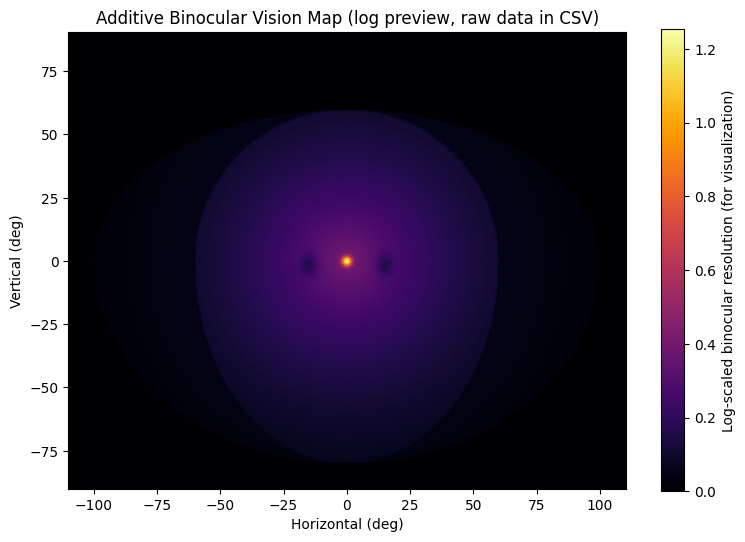

'binocular_vision_map_raw.csv'

In [52]:
# Recompute additive binocular vision map with raw values (no normalization)
# Also produce a log-scaled visualization for clarity

# Monocular fields
maskL = field_mask(X, Y, "left", GENE)
maskR = field_mask(X, Y, "right", GENE)
resL = resolution_map(X, Y, maskL, "left", GENE)
resR = resolution_map(X, Y, maskR, "right", GENE)

# Additive binocular integration
resBin_raw = resL * maskL + resR * maskR
maskBin = np.maximum(maskL, maskR)

# Save raw additive values for shader
data_raw = []
for i in range(len(y)):
    for j in range(len(x)):
        if maskBin[i, j] > 0:
            data_raw.append((x[j], y[i], resBin_raw[i, j]))
df_shader_raw = pd.DataFrame(data_raw, columns=["x_deg", "y_deg", "resolution_raw"])
csv_path_raw = "binocular_vision_map_raw.csv"
df_shader_raw.to_csv(csv_path_raw, index=False)

# Log-scaled preview for visualization only
resBin_log = np.log1p(resBin_raw)  # log(1+res)
plt.figure(figsize=(9,6))
plt.imshow(resBin_log, extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="inferno")
plt.colorbar(label="Log-scaled binocular resolution (for visualization)")
plt.title("Additive Binocular Vision Map (log preview, raw data in CSV)")
plt.xlabel("Horizontal (deg)"); plt.ylabel("Vertical (deg)")
plt.show()

csv_path_raw